In [4]:
import sys
sys.path.append("../")

from tqdm import tqdm
import numpy as np
import pickle
import lzma
import os

from SALib.sample import saltelli


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

plt.rc("text", usetex=False)
plt.rc("font", family="serif")

# Extract data from results

In [5]:
# problem definition
PROBLEM = {
    "num_vars" : 5,
    "names"    : ["theta",
                  "gain_right",
                  "saving_prop",
                  "prob_left",
                  "alpha"],
    "bounds"   : [[0.01, 0.20],
                  [1.70, 8.00],
                  [0.70, 0.80],
                  [0.30, 0.45],
                  [2.00, 12.0]]
}

# generate Saltelli samples
NUM_SAMPLES = 1024
X = saltelli.sample(PROBLEM, NUM_SAMPLES, calc_second_order=False)

/var/folders/bj/4q98hxqx4vq6wwm8qqllvxmr0000gn/T/ipykernel_6042/1920276778.py:18: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  X = saltelli.sample(PROBLEM, NUM_SAMPLES, calc_second_order=False)


In [26]:
theta  = []
alpha  = []
saving = []
richer_prop = []

for f in tqdm(os.listdir("../new_W_arrays/")):

    data = pickle.load(lzma.open(f"../new_W_arrays/{f}"))

    for i,row in enumerate(data):

        # store params
        theta.append(X[i][0])
        alpha.append(X[i][-1])
        saving.append(X[i][2])

        # compute proportion of agents who have final wealth > initial wealth
        richer_prop.append(np.mean(row[:,-1]>row[:,0]))

100%|███████████████████████████████████████████| 20/20 [14:14<00:00, 42.73s/it]


In [33]:
with open("phase_plot_data.pickle", "wb") as f:
    pickle.dump({
        "theta":theta,
        "alpha":alpha,
        "saving":saving,
        "richer_prop":richer_prop
    }, f)

In [75]:
c = []
for p in richer_prop:
    if p == 0:
        c.append("g")
    elif p < 0.8:
        c.append("crimson")
    else:
        c.append("dodgerblue")

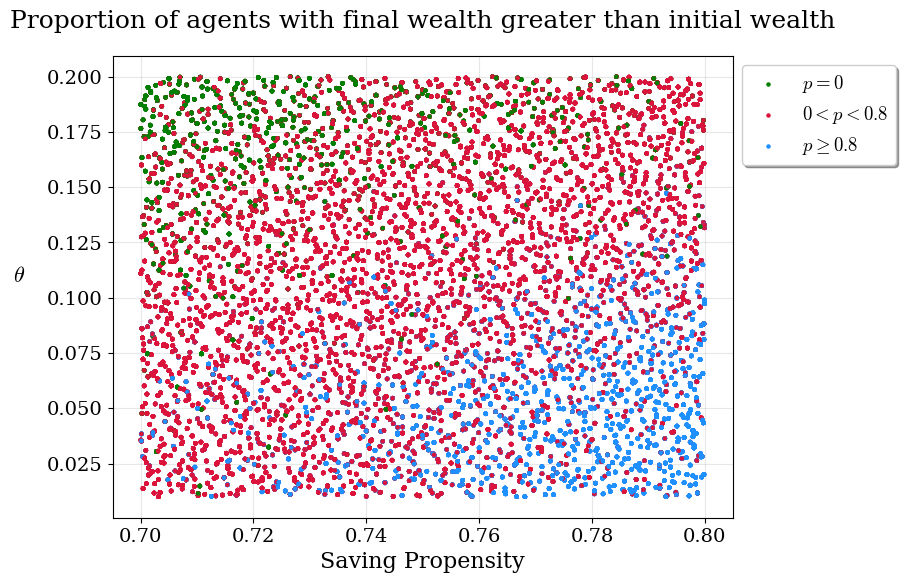

In [81]:
plt.scatter(saving, theta, c=c, s=5)

b_index = c.index("g")
plt.scatter(saving[b_index], theta[b_index], c="g", label=r"$p=0$", s=5)

o_index = c.index("crimson")
plt.scatter(saving[o_index], theta[o_index], c="crimson", label=r"$0 < p < 0.8$", s=5)

r_index = c.index("dodgerblue")
plt.scatter(saving[r_index], theta[r_index], c="dodgerblue", label=r"$p\geq0.8$", s=5)

plt.legend(bbox_to_anchor=(1,1), shadow=True)
plt.title("Proportion of agents with final wealth greater than initial wealth", pad=20)
plt.xlabel("Saving Propensity")
plt.ylabel(r"$\theta$", rotation=0, labelpad=20)
plt.show()

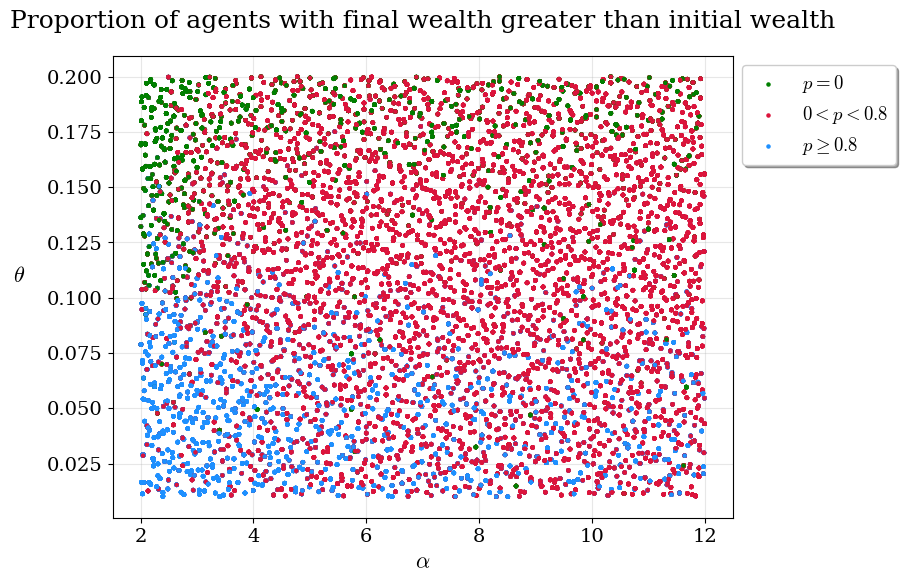

In [84]:
plt.scatter(alpha, theta, c=c, s=5)

b_index = c.index("g")
plt.scatter(alpha[b_index], theta[b_index], c="g", label=r"$p=0$", s=5)

o_index = c.index("crimson")
plt.scatter(alpha[o_index], theta[o_index], c="crimson", label=r"$0 < p < 0.8$", s=5)

r_index = c.index("dodgerblue")
plt.scatter(alpha[r_index], theta[r_index], c="dodgerblue", label=r"$p\geq0.8$", s=5)

plt.legend(bbox_to_anchor=(1,1), shadow=True)
plt.title("Proportion of agents with final wealth greater than initial wealth", pad=20)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\theta$", rotation=0, labelpad=20)
plt.show()

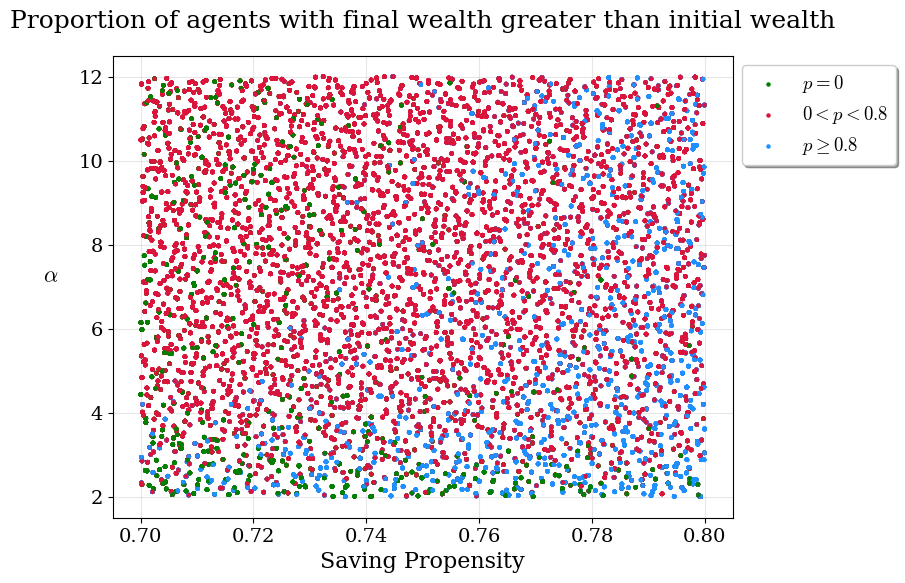

In [83]:
plt.scatter(saving, alpha, c=c, s=5)

b_index = c.index("g")
plt.scatter(saving[b_index], alpha[b_index], c="g", label=r"$p=0$", s=5)

o_index = c.index("crimson")
plt.scatter(saving[o_index], alpha[o_index], c="crimson", label=r"$0 < p < 0.8$", s=5)

r_index = c.index("dodgerblue")
plt.scatter(saving[r_index], alpha[r_index], c="dodgerblue", label=r"$p\geq0.8$", s=5)

plt.legend(bbox_to_anchor=(1,1), shadow=True)
plt.title("Proportion of agents with final wealth greater than initial wealth", pad=20)
plt.xlabel("Saving Propensity")
plt.ylabel(r"$\alpha$", rotation=0, labelpad=20)
plt.show()